# Experiments

This notebook contains several experiments for encoding high-dimensional vectors representing concepts. The concept's definitions rely on a set of semantic features obtained from a dataset collected by McRae et al. 

This notebook uses the functions declared in HDComputingbasics and EncodingDataset to create and compare vector representations. 

## Header

Libraries and additional programs

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import random
from scipy.stats.stats import pearsonr, spearmanr

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,9]

pathh = '../Data/'
exp_file = '../Data/Human_Similarity.xlsx'

## Initializing memory and encoding dataset in HD space

In [4]:
%run EncodingDataset.ipynb
Init_mem()

End of memory initialization
Begining to encode dataset...
End of encoding


## Concept similarity

### a) Human-judged similarity

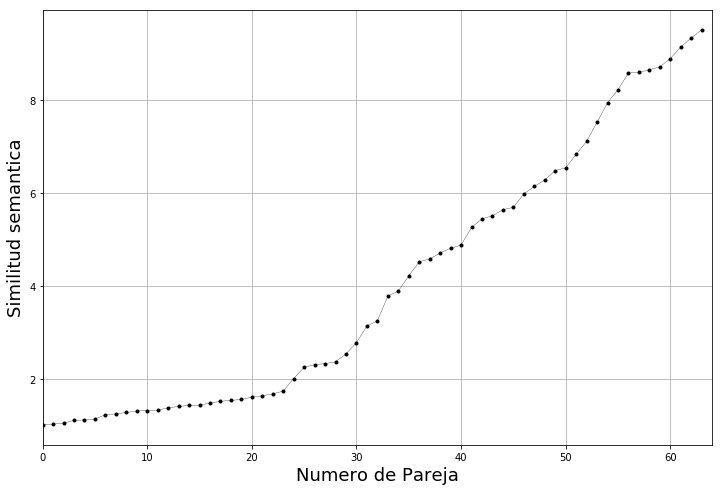

In [5]:
def ListofPairs ( ):
    "It obtains the list of concept pairs rated by Humans"
    df = pd.read_excel(exp_file)
    ordered = df.sort_values(by='Sim')
    c1 = map(str, list( ordered['concept 1'] ))
    c2 = map(str, list( ordered['concept 2'] ))
    L1 = map(list, zip(c1,c2))
    # Sorting by value
    ordered = df.sort_values(by='Sim')
    L2 = list(ordered['Sim'])
    return L1, L2

PConcepts, Hum_Sim = ListofPairs()

x = np.array(range(64))

plt.rcParams["figure.figsize"] = [12,8]

plt.plot(Hum_Sim, color='k', linestyle='-', marker='.', markersize=6, linewidth=.3 )  
plt.xlim((0,64))
plt.xlabel('Numero de Pareja', fontsize=18)
plt.ylabel('Similitud semantica', fontsize=18)
plt.grid(True)
plt.savefig('HumSim.png')


### b) Measuring similarity

In this cell we measure the similarity of each pair of concepts with each similarity measure.

In [6]:
# Create dictionary of distances for each method
Dict_HD = {}; Dict_McRae = {}; Dict_wup = {}; Dict_lch = {}; Dict_res = {}; Dict_jcn = {}; Dict_GlossOverlap = {}

# Loop over all pairs of concepts
key = 0
print "Starting"
for pair in PConcepts:
    print key,
    # VSA
    Dict_HD[key] = 1. - HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()) / float(N)
    # McRae
    Dict_McRae[key] = McRae_simi(pair)
    # Wu & Palmer
    Dict_wup[key] = similarity_fun(wn.wup_similarity, pair)
    # Leacock & Chodorow
    Dict_lch[key] = similarity_fun(wn.lch_similarity, pair)
    # Resnik
    Dict_res[key] = similarity_fun(wn.res_similarity, pair, brown_ic)
    # Jiang & Conrad
    Dict_jcn[key] = similarity_fun(wn.jcn_similarity, pair, brown_ic)
    # Newly added: Extended gloss overlaps
    Dict_GlossOverlap[key] = similarity_fun(GlossRelatedness, pair)
    key += 1
print "End"

Starting
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 End


### Pirró & Euzenat relatedness measure

For the FaITH measure we obtained the similarity value for each pair from the "Java WordNet Similarity Library". This code was kindly shared by Giuseppe Pirró upon request. 

For more information on this library visit: https://simlibrary.wordpress.com/obtaining-the-similarity-library/

In [7]:
Faith_rel = [0.775212021177373,  0.15923558025435458,  0.8170208828537676,  0.33853972249476155, 0.7861997148711021,  0.004810182852762178,
         0.0046200348878155835, 0.763822248978457, 0.6096878654007747, 0.7777645490911547, 0.1659469335590268, 0.7110415588155834, 0.5272439906799019,
          0.5903398679327476, 0.1636359503568791, 0.6088308713691877, 0.4535672918360572, 0.4930226138395317, 0.4883801316451221,
          0.1308130631823140, 0.6044051786969269, 0.14210674386294322, 0.7889246781173663, 0.5899396720164379, 0.5833700708914448,
          0.4881518657711761, 0.48360023654391676, 0.30092775623250656, 0.5646663492871861, 0.5602506937986234, 0.5538081921326253,
          0.33888995243923614, 0.4841257163131293, 0.1534360344880267, 0.49239548449468856, 0.03442139006134628, 0.4686020159254125,
          0.004394779331623425, 0.1690345073141489, 0.5066022372200712, 0.48428237458481754, 0.12004335318053518, 0.18758569399764846,
          0.4702235163724711, 0.1942883150689591, 0.19002694046815294, 0.03442139006134628, 0.15191873168381645, 0.19015556730231345,
          0.1386688283590378, 0.004862268365414031, 0.1375312433803571, 0.0049279262556529944, 0.17633443880493346, 0.1985541588059305,
          0.5069208157880991, 0.274349305987516, 0.005261997333713331, 0.4702235163724711, 0.31489545741456226, 0.17427498355437368,
          0.004740377540793999, 0.36091724276902865, 0.4702235163724711]

Faith_rel.reverse()

#### Word2vec

The word2vec similarity values were obtained by using the online model GoogleNews Negative 300 located in:
http://bionlp-www.utu.fi/wv_demo/

In [8]:
wor2vec = [0.8266455382108688, 0.8415886908769608, 0.6807796359062195, 0.8549512177705765, 0.7889042645692825,0.7572457492351532, 0.9644697681069374,
 0.9086581096053123, 0.721133679151535, 0.798522099852562, 0.6787266135215759, 0.647223562002182, 0.8754299804568291, 0.7132392525672913, 0.5137060284614563,
 0.7079006731510162, 0.7908777445554733, 0.6040608584880829, 0.7750198692083359, 0.8645816594362259, 0.801501139998436, 0.8661240190267563, 0.9446705915033817,
 0.7778908014297485,0.7617271989583969, 0.9460270218551159, 0.6787038743495941, 0.6298098266124725, 0.34256309270858765, 0.5335637629032135, 0.425468385219574,
 0.6396835148334503, 0.7532171458005905, 0.6008948087692261, 0.6555060744285583, 0.8036634474992752, 0.6344016194343567, 0.5572055578231812,
 0.5680522620677948, 0.6650005877017975, 0.7124116122722626, 0.8490201681852341, 0.4361061453819275, 0.7542188316583633, 0.7908401340246201, 0.6777022778987885,
 0.7414279878139496, 0.6713162362575531, 0.6733077168464661, 0.4685635566711426, 0.696144700050354,0.4178849458694458, 0.4083590507507324, 0.3246746063232422, 
 0.8281060010194778, 0.4699099063873291, 0.5488384962081909, 0.4087533950805664, 0.2889356017112732, 0.5542740821838379, 0.34602856636047363, 0.8630458861589432,
 0.3001639246940613, 0.5954327881336212]

# Getting similarity instead of distance
wor2vec = map(lambda x: 1-x, wor2vec)

### c) Computing correlations

In [9]:
# 1) Obtain "human list", it can be the average responses or an specific one
Hum_sim =  ListofPairs( )  #or Q + #0-30
    
# 2) Obtain list of ordered concepts (keys)
keys = map(lambda x: PConcepts.index(x), Hum_sim[0])
    
# 3) Create a list of distances according to each metric by consulting the appropiate dictionary
HD_simm = [Dict_HD[x] for x in keys]
HD_sim = map(lambda x: (x - min(HD_simm)) / (max(HD_simm) - min(HD_simm)), HD_simm) 

McRae_simm = [Dict_McRae[x] for x in keys]
McRae_sim = map(lambda x: (x - min(McRae_simm)) / (max(McRae_simm) - min(McRae_simm)), McRae_simm) 

wup_simm = [Dict_wup[x] for x in keys]
wup_sim = map(lambda x: (x - min(wup_simm)) / (max(wup_simm) - min(wup_simm)), wup_simm) 

lch_simm = [Dict_lch[x] / 2.944 for x in keys]
lch_sim = map(lambda x: (x - min(lch_simm)) / (max(lch_simm) - min(lch_simm)), lch_simm) 

res_simm = [Dict_res[x] / 10.574 for x in keys] # / max
res_sim = map(lambda x: (x - min(res_simm)) / (max(res_simm) - min(res_simm)), res_simm) 

jcn_simm = [Dict_jcn[x] for x in keys]
jcn_sim = map(lambda x: (x - min(jcn_simm)) / (max(jcn_simm) - min(jcn_simm)), jcn_simm) 

EGO_simm = [Dict_GlossOverlap[x] for x in keys]
EGO_sim  = [x if x < 40 else 40 for x in EGO_simm]

# 4) Calculate correlations
correlations = [['HDC', spearmanr(Hum_sim[1], HD_sim)[0]], ['McRae', spearmanr(Hum_sim[1], McRae_sim)[0]],
                ['wup', spearmanr(Hum_sim[1], wup_sim)[0]], ['lch', spearmanr(Hum_sim[1], lch_sim)[0]],
                ['res', spearmanr(Hum_sim[1], res_sim)[0]], ['jcn', spearmanr(Hum_sim[1], jcn_sim)[0]],
                ['Gloss', spearmanr(Hum_sim[1], EGO_sim)[0]], ['Faith', spearmanr(Hum_sim[1], Faith_rel)[0]], 
                ['word2vec', spearmanr(Hum_sim[1],wor2vec)[0]]]

print correlations

[['HDC', 0.6968795074973622], ['McRae', 0.654625652440956], ['wup', 0.46550073981610324], ['lch', 0.43356238217204224], ['res', 0.568240420305135], ['jcn', 0.4247017662686857], ['Gloss', 0.3620146541340179], ['Faith', 0.4284814843032825], ['word2vec', 0.549587912087912]]


## d) Plotting

### Original & VSA

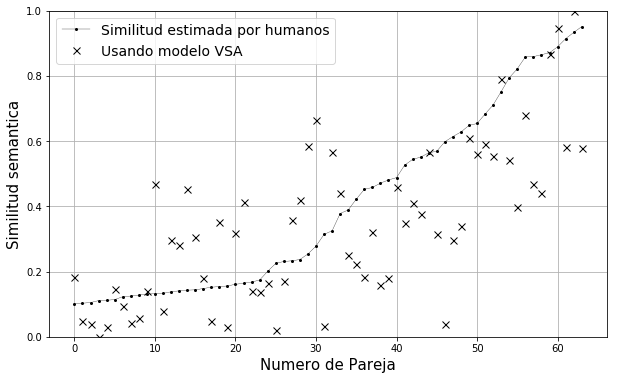

In [10]:
plt.rcParams["figure.figsize"] = [10, 6]
# Human similarity
plt.plot([x/10 for x in Hum_Sim], color='k', linestyle='-', marker='.', markersize=4, linewidth=.3 )  
# VSA
plt.plot(HD_sim, color='k', linestyle='None', marker='x', markersize=7, linewidth=1 )  
plt.xlabel('Numero de Pareja', fontsize=15)
plt.ylabel('Similitud semantica', fontsize=15)
plt.ylim(0,1)
plt.grid(True)
plt.legend(['Similitud estimada por humanos', 'Usando modelo VSA'], fontsize = 14)
plt.savefig('Hum_VSA.png', dpi=300)

### Other evaluations

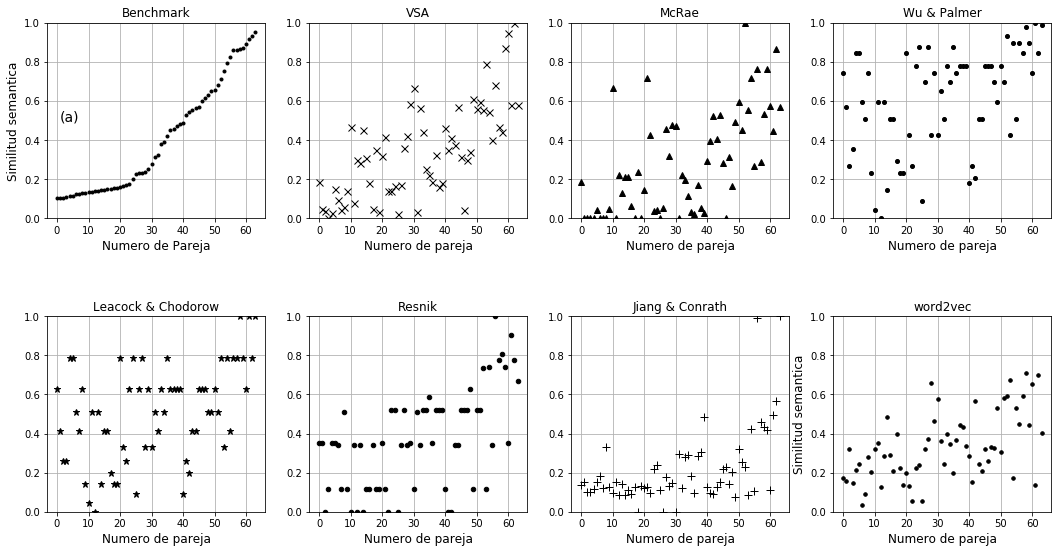

In [11]:
# Plotting
plt.rcParams["figure.figsize"] = [18, 9]
f_size = 12

plt.subplots_adjust(hspace=0.5)

# Human similarity
plt.subplot(241)
plt.plot([x/10 for x in Hum_Sim], color='k', linestyle='None', marker='.', markersize=6, linewidth=.3 )  
plt.title('Benchmark', fontsize=f_size)
plt.xlabel('Numero de Pareja', fontsize=f_size)
plt.ylabel('Similitud semantica', fontsize=f_size)
plt.ylim(0,1)
plt.grid(True)
plt.text(1, 0.5, '(a)', fontsize = 14)

# VSA
plt.subplot(242)
plt.plot(HD_sim, color='k', linestyle='None', marker='x', markersize=7, linewidth=1 )  
plt.title('VSA', fontsize=f_size)
plt.xlabel('Numero de pareja', fontsize=f_size)
#plt.ylabel('Similitud semantica', fontsize=f_size)
plt.ylim(0,1)
plt.grid(True)

# McRae
plt.subplot(243)
plt.plot(McRae_sim, color='k', linestyle='None', marker='^', markersize=6, linewidth=1 )  
plt.title('McRae', fontsize=f_size)
plt.xlabel('Numero de pareja', fontsize=f_size)
#plt.ylabel('Similitud semantica', fontsize=f_size)
plt.ylim(0,1)
plt.grid(True)

# WuP
plt.subplot(244)
plt.plot(wup_sim, color='k', linestyle='None', marker='.', markersize=8, linewidth=1 )  
plt.title('Wu & Palmer', fontsize=f_size)
plt.xlabel('Numero de pareja', fontsize=f_size)
#plt.ylabel('Similitud semantica', fontsize=f_size)
plt.ylim(0,1)
plt.grid(True)

# LCH
plt.subplot(245)
plt.plot(lch_sim, color='k', linestyle='None', marker='*', markersize=7, linewidth=1 )  
plt.title('Leacock & Chodorow', fontsize=f_size)
plt.xlabel('Numero de pareja', fontsize=f_size)
#plt.ylabel('Similitud semantica', fontsize=f_size)
plt.ylim(0,1)
plt.grid(True)

# Resnick
plt.subplot(246)
plt.plot(res_sim, color='k', linestyle='None', marker='.', markersize=9, linewidth=1 )  
plt.title('Resnik', fontsize=f_size)
plt.xlabel('Numero de pareja', fontsize=f_size)
#plt.ylabel('Similitud semantica', fontsize=f_size)
plt.ylim(0,1)
plt.grid(True)

#JnC
plt.subplot(247)
plt.plot(jcn_sim, color='k', linestyle='None', marker='+', markersize=8, linewidth=1 )  
plt.title('Jiang & Conrath', fontsize=f_size)
plt.xlabel('Numero de pareja', fontsize=f_size)
#plt.ylabel('Similitud semantica', fontsize=f_size)
plt.ylim(0,1)
plt.grid(True)

# word2vec
plt.subplot(248)
plt.plot(wor2vec, color='k', linestyle='None', marker='.', markersize=7, linewidth=1 )  
plt.title('word2vec', fontsize=f_size)
plt.xlabel('Numero de pareja', fontsize=f_size)
plt.ylabel('Similitud semantica', fontsize=f_size)
plt.ylim(0,1)
plt.grid(True)


plt.savefig('SubPlots.png', dpi=500)

### Extended gloss Overlap

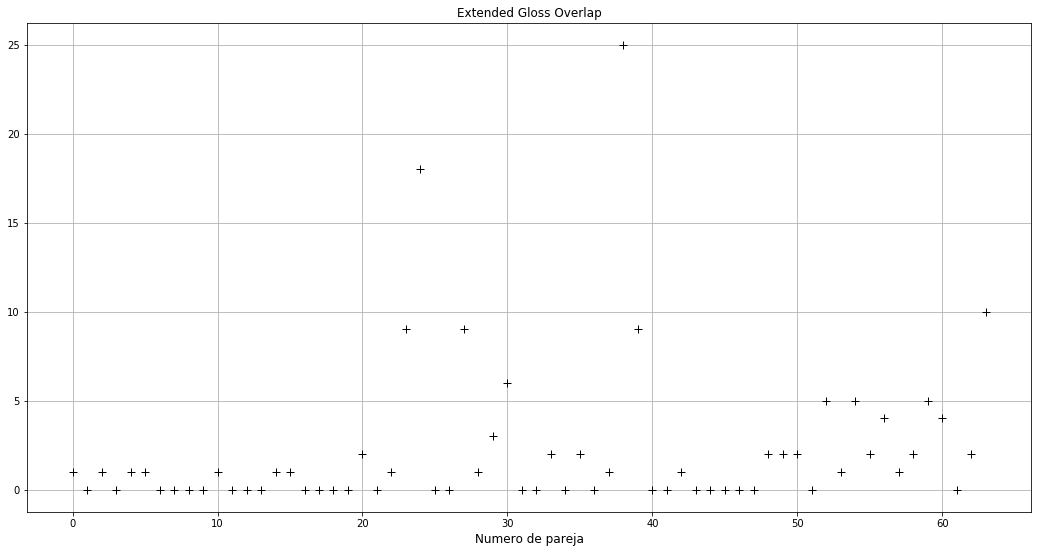

In [12]:
#Gloss Overlap
plt.plot(EGO_sim, color='k', linestyle='None', marker='+', markersize=8, linewidth=1 )  
plt.title('Extended Gloss Overlap', fontsize=f_size)
plt.xlabel('Numero de pareja', fontsize=f_size)
#plt.ylabel('Similitud semantica', fontsize=f_size)
# plt.ylim(0,1)
plt.grid(True)

### FaITH measure

Pirró & Euzenat

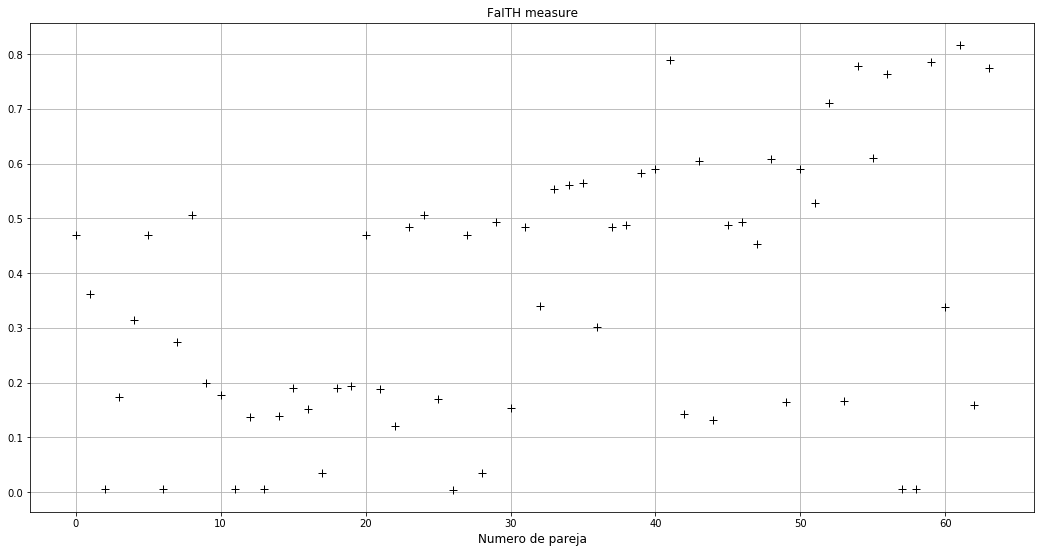

In [13]:
#Gloss Overlap
plt.plot(Faith_rel, color='k', linestyle='None', marker='+', markersize=8, linewidth=1 )  
plt.title('FaITH measure', fontsize=f_size)
plt.xlabel('Numero de pareja', fontsize=f_size)
#plt.ylabel('Similitud semantica', fontsize=f_size)
# plt.ylim(0,1)
plt.grid(True)
